# Data Pre-Processing


## Import Packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)


## Import Data


In [ ]:
df = pd.read_csv("Visadataset.csv")
df.head(5)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.shape


(25480, 12)

# Data Cleaning


## Handling Missing values


- Handle Missing values
- Handling Duplicates
- Check data types
- Understand the dataset


### Check Null Values


In [ ]:
features_with_na = [ features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
  print(feature, np.round(df[feature].isnull().sum() * 100, 5), "% missing values")


In [ ]:
features_with_na


[]

- **There are no null values**


### Handling duplicates


In [ ]:
df.duplicated().sum()


0

- **There are no duplicates in the data**


### Remove unnecessary columns


In [ ]:
df.drop("case_id", inplace=True, axis=1)


In [ ]:
df.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Feature Engineering


## Feature Extraction


### Get company's age from `yr_of_estab`


In [ ]:
from datetime import date


In [ ]:
current_year = date.today().year
current_year


2025

In [ ]:
df["company_age"] = current_year - df["yr_of_estab"]
df.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [ ]:
# Drop yr_of_estab as no longer needed
df.drop("yr_of_estab", inplace=True, axis=1)


## Type of Features


### Numeric Features


In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("Number of Numerical Features : ", len(num_features), num_features)


Number of Numerical Features :  3 ['no_of_employees', 'prevailing_wage', 'company_age']


### Categorical Features


In [ ]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == "O"]
print("Number of categorical features : ", len(cat_feature), cat_feature)


Number of categorical features :  8 ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


### Discrete Features


In [ ]:
discrete_feature = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print(" Number of Discrete features : ", len(discrete_feature), discrete_feature)


 Number of Discrete features :  0 []


### Continous Features


In [ ]:
continuous_feature = [feature for feature in num_features if feature not in discrete_feature]
print(" Number of Continuous features : ", len(continuous_feature), continuous_feature)


 Number of Continuous features :  3 ['no_of_employees', 'prevailing_wage', 'company_age']


## Split into X and Y


**- Split dataframe into X and y**


In [ ]:
X = df.drop("case_status", axis=1)
y = df["case_status"]


In [ ]:
y.head()


0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

### Manual encoding: target column


In [ ]:
y = np.where(y=="Denied", 1, 0)
y


array([1, 0, 1, ..., 0, 0, 0])

# Feature Transformation


## Distribution of Data


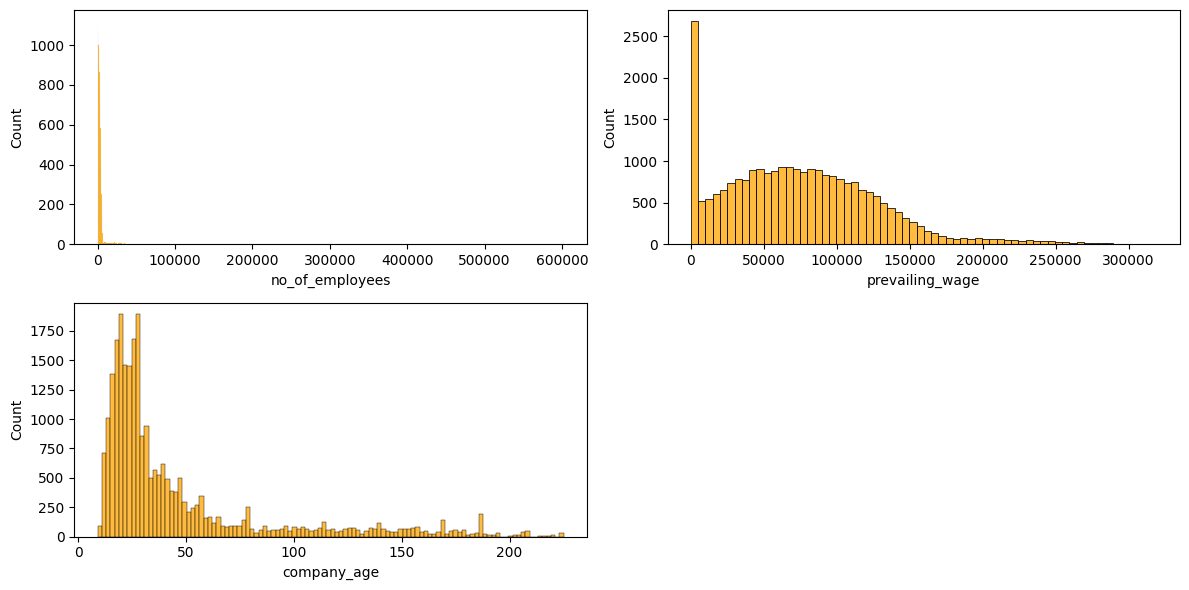

In [ ]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_features):
  plt.subplot(2, 2, i + 1)
  sns.histplot(x=X[col], color="orange")
  plt.xlabel(col)
  plt.tight_layout()


- `no_of_employees` and `company_age` are skewed
- Hence apply a power transform to make data more gaussian-like


Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.


## Checking Skewness


**What is Skewness ?**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero


In [ ]:
X[continuous_feature].skew(axis=0, skipna=True)


no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Postively Skewed: `company_age`, `no_of_employees`
- We can handle outliers and the check the skewness


## Apply Power transforms


In [ ]:
from sklearn.preprocessing import PowerTransformer


In [ ]:
pt = PowerTransformer(method="yeo-johnson")
transform_features = ["company_age", "no_of_employees"]
X_Copy = pt.fit_transform(X[transform_features])


In [ ]:
X_Copy = pd.DataFrame(X_Copy, columns=transform_features)


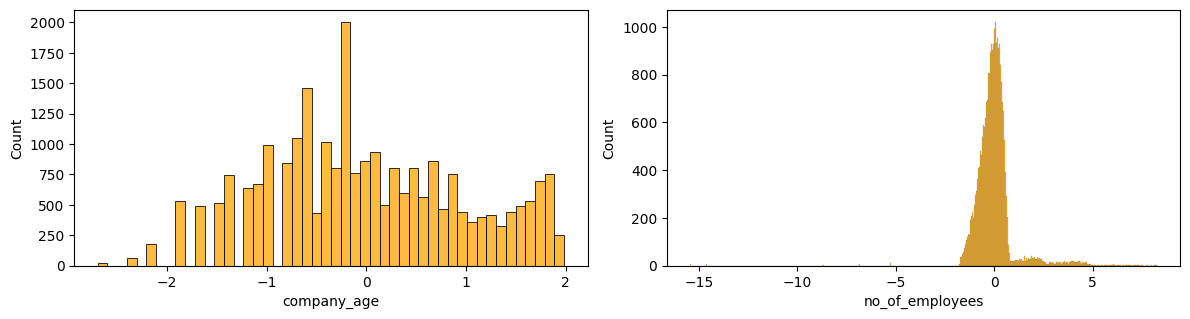

In [ ]:
plt.figure(figsize=(12,6))
for i, col in enumerate(transform_features):
  plt.subplot(2, 2, i + 1)
  sns.histplot(x=X_Copy[col], color="orange")
  plt.xlabel(col)
  plt.tight_layout()


In [ ]:
X_Copy.skew(axis=0, skipna=True)


company_age        0.112260
no_of_employees    0.399339
dtype: float64

- So Power transform can be used


# Feature Encoding and Scaling


**One Hot Encoding for Columns which had lesser unique values and not ordinal**

- One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories**

- Ordinal encoding is used here as label encoder is supported for column transformer.
- Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler**

- Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**

- Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.


In [ ]:
for feature in cat_feature:
  print(feature, " : ", df[feature].nunique())


continent  :  6
education_of_employee  :  4
has_job_experience  :  2
requires_job_training  :  2
region_of_employment  :  5
unit_of_wage  :  4
full_time_position  :  2
case_status  :  2


## Preprocessing using Column Transformer


In [ ]:
ord_columns = ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
onehot_columns = ['continent', 'unit_of_wage', 'region_of_employment']
transform_columns =  transform_features


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
numeric_transfromer = StandardScaler()
onehot_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()


In [ ]:
transform_pipe = Pipeline(steps=[
  ("transformer", PowerTransformer(method="yeo-johnson"))
])


In [ ]:
preprocessor = ColumnTransformer((
  [
    ("OneHotEncoder", onehot_transformer, onehot_columns),
    ("OrdinalEncoder", ordinal_transformer, ord_columns),
    ("Transformer", numeric_transfromer, transform_features)
  ]
))


In [ ]:
X = preprocessor.fit_transform(X)
X


array([[ 0.        ,  1.        ,  0.        , ...,  2.        ,
        -0.65122993,  0.38666657],
       [ 0.        ,  1.        ,  0.        , ...,  3.        ,
        -0.53321103, -0.14228155],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.6748337 ,  1.69498375],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  3.        ,
         1.63833662, -0.19871259],
       [ 0.        ,  1.        ,  0.        , ...,  3.        ,
         2.18122353, -0.16387483],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.45814768, -0.10805575]])

# Model Training


## Imbalanced Data Solution


In [ ]:
from imblearn.combine import SMOTEENN, SMOTETomek


In [ ]:
# Resampling to minority class

smt = SMOTEENN(random_state=41, sampling_strategy="minority")

X_res, y_res = smt.fit_resample(X, y)


## Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=41)
X_train.shape, X_test.shape


((12589, 21), (3148, 21))

## Model Setup


In [69]:
# Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [77]:
# evaluation metrics
def evaluate_clf(true, predicted):
  acc = accuracy_score(true, predicted)
  f1 = f1_score(true, predicted)
  precison = precision_score(true, predicted)
  recall = recall_score(true, predicted)
  roc_auc = roc_auc_score(true, predicted)
  
  return acc, f1, precison, recall, roc_auc
  

In [ ]:
# Models
models = {
  "Random Forrest": RandomForestClassifier(),
  "Decision Tree": DecisionTreeClassifier(),
  "Gradient boosting": GradientBoostingClassifier(),
  "Logistic Regression": LogisticRegression(),
  "K-Neighbours Classifier": KNeighborsClassifier(),
  "XGB Classifier": XGBClassifier(),
  "CatBoost Classifier": CatBoostClassifier(verbose=False),
  "Supoort Vector Classifier": SVC(),
  "AdaBoost Classifier": AdaBoostClassifier()
}


In [97]:
# evaluate models and return report
def evaluate_models(X, y, models):
  """ 
  This function takes in X and y and models dictionary as input
  It splits the data into Train and Test split
  Iterates through model dictionary and evaluates metrics
  Returns: Dataframe which contains a report of all models metrics with cost
  """
  
  # separate data into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  models_list = []
  accuracy_list = []
  auc = []
  
  for i in range(len(list(models))):
    # Train Model
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    accuracy_list.append(model_test_accuracy)
    
    print("Model performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))
    
    print("---------------------------------------------------")
    
    print("Model performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
    
    print("===================================================")
    
  report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=["Model Name", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
    
  return report


## Model Training


In [ ]:
base_model_report = evaluate_models(X=X_res, y=y_res, models=models)


Random Forrest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
---------------------------------------------------
Model performance for Test set
- Accuracy: 0.9654
- F1 Score: 0.9669
- Precision: 0.9637
- Recall: 0.9702
- Roc Auc Score: 0.9652
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
---------------------------------------------------
Model performance for Test set
- Accuracy: 0.9470
- F1 Score: 0.9490
- Precision: 0.9517
- Recall: 0.9464
- Roc Auc Score: 0.9470
Gradient boosting
Model performance for Training set
- Accuracy: 0.9026
- F1 Score: 0.9039
- Precision: 0.9220
- Recall: 0.8865
- Roc Auc Score: 0.9032
---------------------------------------------------
Model performance for Test set
- Accuracy: 0.8961
- F1 Score: 0.8988
- Precision: 0.9144
- Recall: 0.8837
- Roc Auc Score: 0.8967
Logis

**Results of All Models**


In [ ]:
base_model_report


,Model Name,Accuracy
0,Random Forrest,0.965375
1,Decision Tree,0.946950
5,XGB Classifier,0.941550
4,K-Neighbours Classifier,0.938374
6,CatBoost Classifier,0.933926
2,Gradient boosting,0.896125
7,Supoort Vector Classifier,0.890724
8,AdaBoost Classifier,0.870394
3,Logistic Regression,0.744917


## Hyperparameter Tuning for Top 3 Models


**Define parameter distribution**


In [ ]:
xgboost_params = {
  "max-depth": range(3, 10, 2),
  "min_child_weight": range(1, 6, 2)
}

randforest_params = {
  "max_depth": [10, 12, None, 15, 20],
  "max_features": ["sqrt", "log2", None],
  "n_estimators": [10, 50, 100, 200]
}

knn_params = {
  "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
  "weights": ["uniform", "distance"],
  "n_neighbors": [3, 4, 5, 7, 9]
}


In [ ]:
# Model List
randomcv_models = [
  ("Random Forrest", RandomForestClassifier(), randforest_params),
  ("K-Neighbours Classifier", KNeighborsClassifier(), knn_params),
  ("XGB Classifier", XGBClassifier(), xgboost_params)
]


**Create a function for model training and report which can be used in hyperparameter tuning loop**


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
model_param = {}

for name, model, params in randomcv_models:
  random = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=1
  )
  random.fit(X_res, y_res)
  
  model_param[name] = random.best_params_


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=10, max_features=sqrt, n_e

In [ ]:
for model_name in model_param:
  print(f"================= Best Params for {model_name} ==================")
  print(model_param[model_name])


================= Best Params for Random Forrest ==================
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
================= Best Params for K-Neighbours Classifier ==================
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}
================= Best Params for XGB Classifier ==================
{'min_child_weight': 1, 'max-depth': 3}


In [ ]:
model_param


{'Random Forrest': {'n_estimators': 200,
  'max_features': 'log2',
  'max_depth': None},
 'K-Neighbours Classifier': {'weights': 'distance',
  'n_neighbors': 3,
  'algorithm': 'auto'},
 'XGB Classifier': {'min_child_weight': 1, 'max-depth': 3}}

## Retraining the model with the best parameters


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
best_models ={
  "Random Forrest": RandomForestClassifier(**model_param["Random Forrest"]),
  "K-Neighbours Classifier": KNeighborsClassifier(**model_param["K-Neighbours Classifier"]),
  "XGB Classifier": XGBClassifier(**model_param["XGB Classifier"]),
}
tuned_report = evaluate_models(X=X_res, y=y_res, models=best_models)


Random Forrest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
---------------------------------------------------
Model performance for Test set
- Accuracy: 0.9609
- F1 Score: 0.9627
- Precision: 0.9600
- Recall: 0.9653
- Roc Auc Score: 0.9607
K-Neighbours Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
---------------------------------------------------
Model performance for Test set
- Accuracy: 0.9781
- F1 Score: 0.9791
- Precision: 0.9747
- Recall: 0.9836
- Roc Auc Score: 0.9778
XGB Classifier
Model performance for Training set
- Accuracy: 0.9816
- F1 Score: 0.9821
- Precision: 0.9835
- Recall: 0.9808
- Roc Auc Score: 0.9816
---------------------------------------------------
Model performance for Test set
- Accuracy: 0.9416
- F1 Score: 0.9439
- Precision: 0.9462
- Recall: 0.9416
- Roc Auc Score: 0.941

In [ ]:
tuned_report


,Model Name,Accuracy
1,K-Neighbours Classifier,0.978081
0,Random Forrest,0.960928
2,XGB Classifier,0.941550


In [ ]:
best_model =KNeighborsClassifier(**model_param["K-Neighbours Classifier"])
best_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Final model 'KNN")
print("Accuracy score value: {:.4f}".format(score))
print(cr)


Final model 'KNN
Accuracy score value: 0.9794
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1486
           1       0.98      0.98      0.98      1662

    accuracy                           0.98      3148
   macro avg       0.98      0.98      0.98      3148
weighted avg       0.98      0.98      0.98      3148



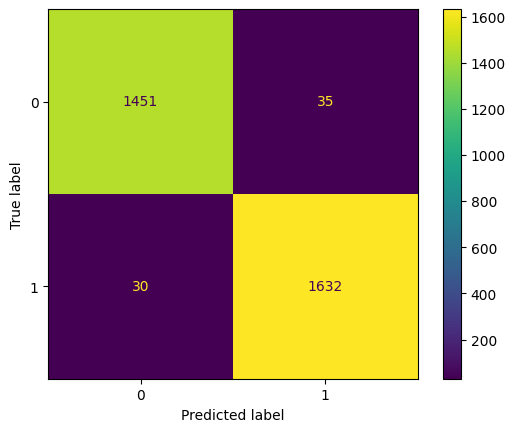

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
